# Disclaimer

The following data involves proprietary information with an actively operating  organization. PII and proprietary information has been redacted for privacy and ethical consideration. The information below is meant to convey professional competency in evaluating and discovering customer base and is not meant for use in any activities outside of mentioned environment.  



# Demographics

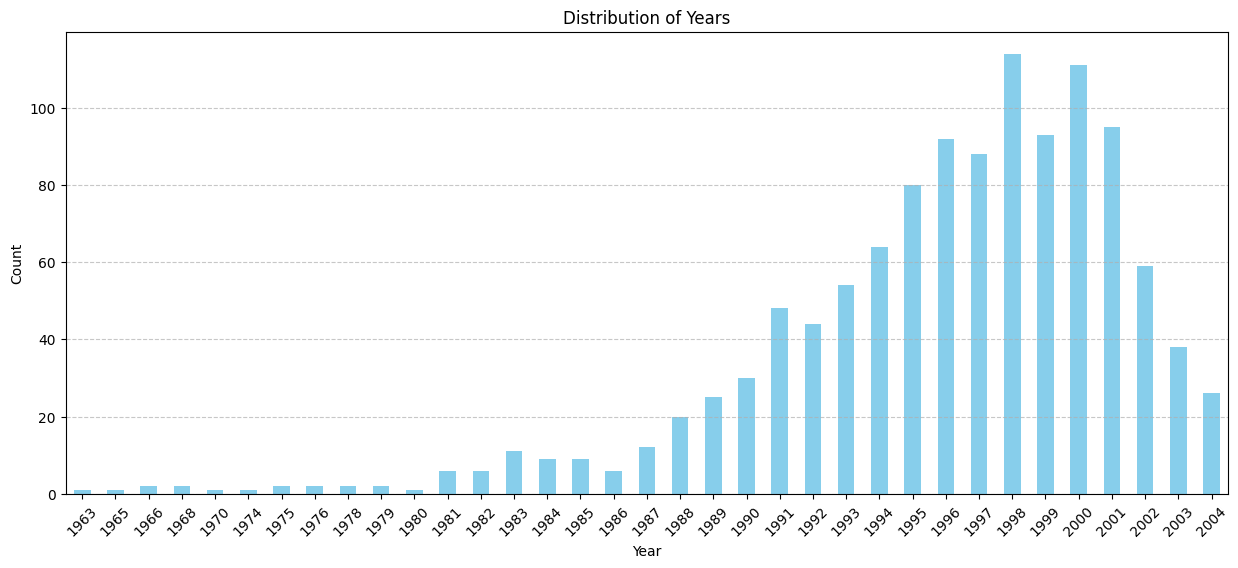

In [ ]:
# Compute value counts
byear_counts = df['byear'].value_counts()

# Sort by year (index) in ascending order
byear_counts = byear_counts.sort_index()

# Plot
plt.figure(figsize=(15, 6))
byear_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Years')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-10-307a26651f95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = current_year - df['byear']


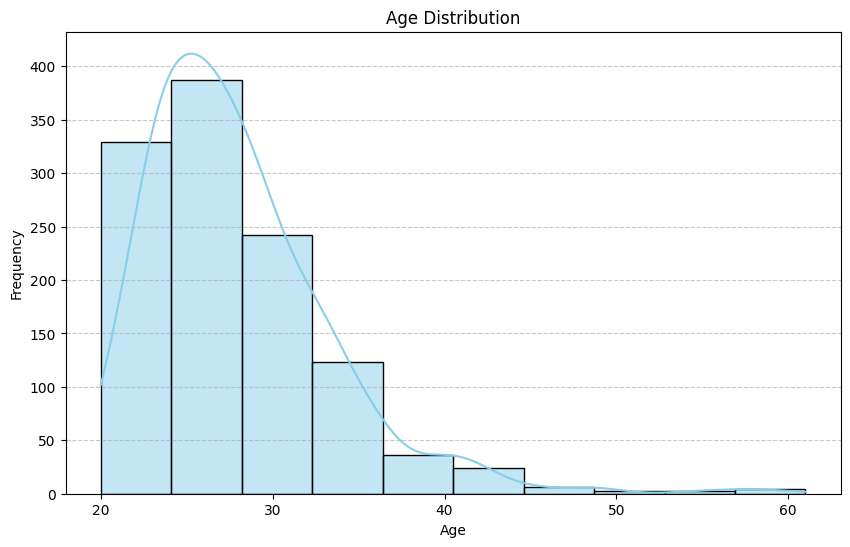

Mean: 28.040622299049264
Median: 27.0
Mode: 26
Standard Deviation: 5.547458873973712


In [ ]:
current_year = 2024

df['Age'] = current_year - df['byear']


# Create a histogram to visualize age distribution
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')  # Histogram with 10 bins and KDE curve

# Add labels and title
plt.xlabel('Age')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.title('Age Distribution')  # Title of the plot

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Create mode
mode = int(df['Age'].mode().iloc[0])

print('Mean:',df['Age'].mean())
print('Median:',df['Age'].median())
print('Mode:', mode)
print('Standard Deviation:', df['Age'].std())


In [ ]:
df.describe()

,Birthdate,byear,Age
count,1157,1157.000000,1157.000000
mean,1996-06-20 11:23:17.061365632,1995.959378,28.040622
min,1963-03-17 00:00:00,1963.000000,20.000000
25%,1993-11-27 00:00:00,1993.000000,24.000000
50%,1997-08-04 00:00:00,1997.000000,27.000000
75%,2000-06-19 00:00:00,2000.000000,31.000000
max,2004-10-29 00:00:00,2004.000000,61.000000
std,NaN,5.547459,5.547459


# Registration Habits

In [ ]:
main_df = pd.read_csv(DATA /my_file)
main_df = main_df.iloc[:,0:6]

# Convert the 'DateTime' column to datetime
main_df['Order Date'] = pd.to_datetime(main_df['Order Date'], format='%m/%d/%Y %H:%M')


# Extract date and time components
main_df['Date'] = main_df['Order Date'].dt.date
main_df['Time'] = main_df['Order Date'].dt.time

main_df['Date'] = pd.to_datetime(main_df['Date'])
main_df.dtypes

# New Column for Day of Week
main_df['DayOfWeek'] = main_df['Date'].dt.day_name()


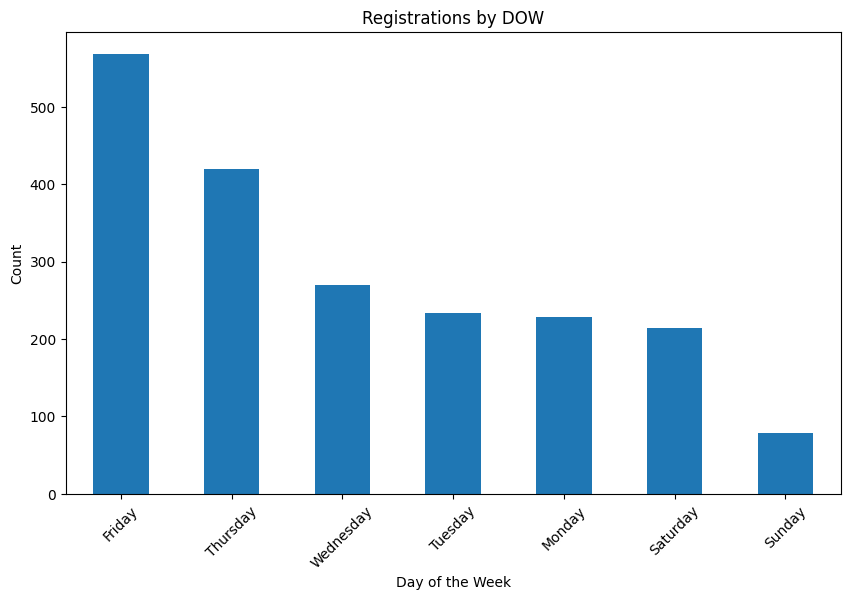


 Visuals suggests that most registrations happen on Saturdays.


In [ ]:
# Count the occurrences of each day
day_counts = main_df['DayOfWeek'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Registrations by DOW')
plt.xticks(rotation=45)
plt.show()

print("\n Visuals suggests that most registrations happen on Saturdays.")

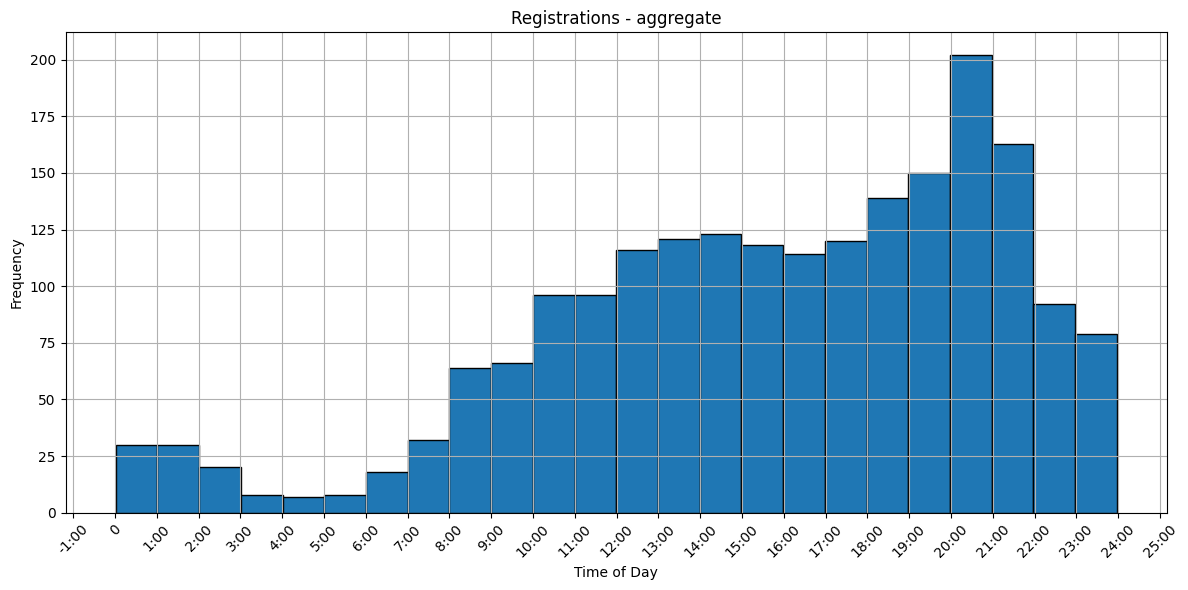

The diagram reviews the data according to time of registration. 
 As expected, most registration occur during the usual waking hours after 8 am. There are certain peaks. The first is at noon. The second 3pm and 4pm. The last peak is at 7pm/8pm. 


In [ ]:
import matplotlib.ticker as ticker


# Convert to time format
main_df['Time'] = main_df['Time'].astype(str)
main_df['Time'] = pd.to_datetime(main_df['Time'], format='%H:%M:%S', errors='coerce')

def time_to_seconds(time_obj):
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

main_df['Seconds'] = main_df['Time'].apply(time_to_seconds)

# Create histogram with human-readable time intervals
plt.figure(figsize=(12, 6))
plt.hist(main_df['Seconds'], bins=24, edgecolor='black')

# Set x-axis ticks to be in hours and minutes
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3600))  # Interval of 1 hour

# Format the x-axis labels as hours
def seconds_to_hours(seconds):
    hours = seconds // 3600
    return f'{hours}{":00" if hours != 0 else ""}'

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: seconds_to_hours(int(x))))

# Add labels and title
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.title('Registrations - aggregate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

print("The diagram reviews the data according to time of registration. \n As expected, most registration occur during the usual waking hours after 8 am. There are certain peaks. The first is at noon. The second 3pm and 4pm. The last peak is at 7pm/8pm. ")

<ipython-input-21-43508277d3c8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['Seconds'] = filter_df['Time'].apply(time_to_seconds)


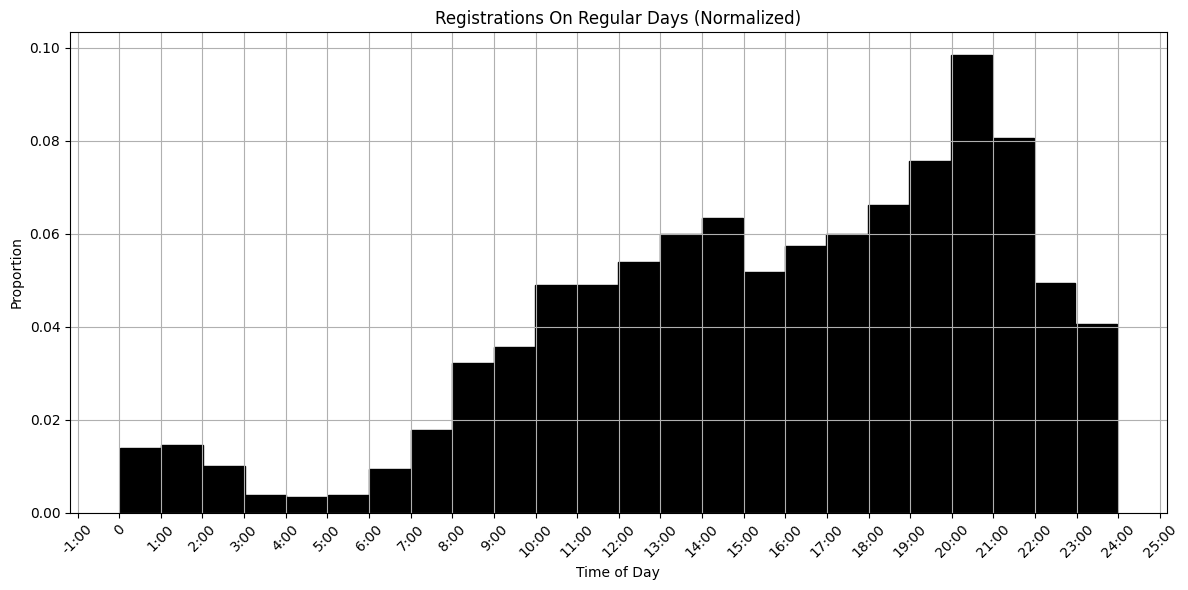


 During a typical day, three peaks are present. First is at 9 am. Second at 3 pm. Third at 8 pm. 
 This may suggest registrations during commute, during an afternoon break, and after dinner.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filter for Non-Saturdays
filter_df = main_df[~main_df['DayOfWeek'].str.contains('Saturday', case=False, na=False)]

def time_to_seconds(time_obj):
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

filter_df['Seconds'] = filter_df['Time'].apply(time_to_seconds)

# Calculate weights to normalize frequencies
weights = [1 / len(filter_df)] * len(filter_df)

# Create histogram with human-readable time intervals
plt.figure(figsize=(12, 6))
plt.hist(filter_df['Seconds'], bins=24, edgecolor='black', color='black', weights=weights)

# Set x-axis ticks to be in hours and minutes
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3600))  # Interval of 1 hour

# Format the x-axis labels as hours
def seconds_to_hours(seconds):
    hours = seconds // 3600
    return f'{hours}{":00" if hours != 0 else ""}'

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: seconds_to_hours(int(x))))

# Add labels and title
plt.xlabel('Time of Day')
plt.ylabel('Proportion')
plt.title('Registrations On Regular Days (Normalized)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

print("\n During a typical day, three peaks are present. First is at 9 am. Second at 3 pm. Third at 8 pm. \n This may suggest registrations during commute, during an afternoon break, and after dinner.")


<ipython-input-22-3b0631323452>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter2_df['Seconds'] = filter2_df['Time'].apply(time_to_seconds)


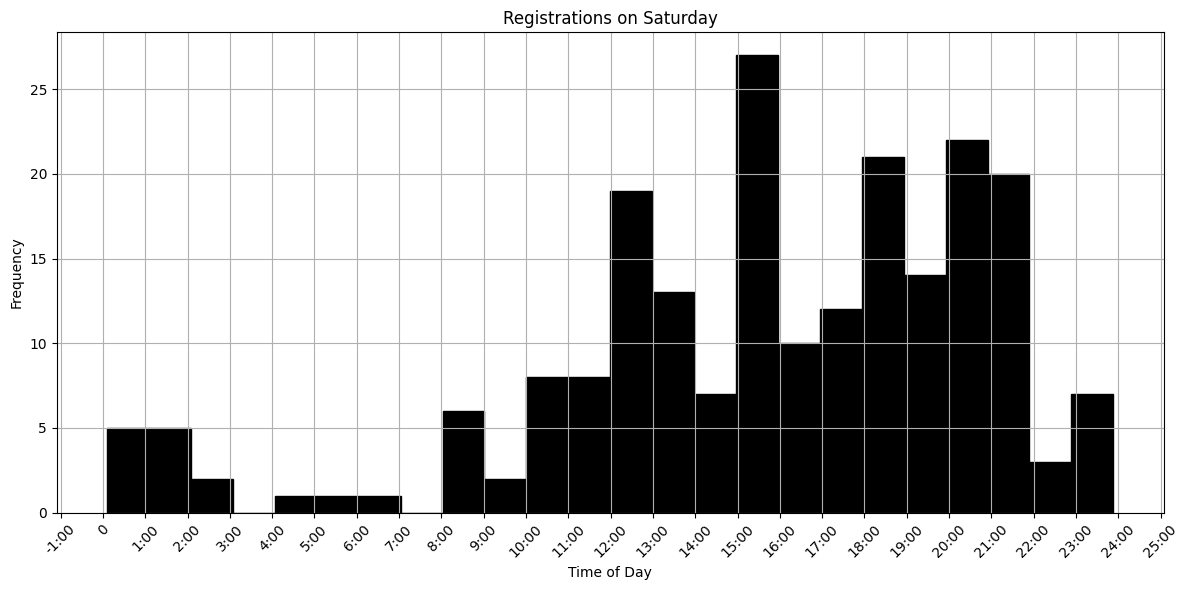


 On Saturdays, we have different peaks. First is at 11 am. Second at 3pm. Third at 7pm. 
 This suggests registration after a late-morning rise, after lunch, and after dinner.


In [ ]:
filter2_df = main_df[main_df['DayOfWeek'].str.contains('Saturday', case=False, na=False)]

def time_to_seconds(time_obj):
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

filter2_df['Seconds'] = filter2_df['Time'].apply(time_to_seconds)

# Create histogram with human-readable time intervals
plt.figure(figsize=(12, 6))
plt.hist(filter2_df['Seconds'], bins=24, edgecolor='black', color='black')

# Set x-axis ticks to be in hours and minutes
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3600))  # Interval of 1 hour

# Format the x-axis labels as hours
def seconds_to_hours(seconds):
    hours = seconds // 3600
    return f'{hours}{":00" if hours != 0 else ""}'

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: seconds_to_hours(int(x))))

# Add labels and title
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.title('Registrations on Saturday')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

print("\n On Saturdays, we have different peaks. First is at 11 am. Second at 3pm. Third at 7pm. \n This suggests registration after a late-morning rise, after lunch, and after dinner.")

<ipython-input-23-7b30ed54c120>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter2_df['Seconds'] = filter2_df['Time'].apply(time_to_seconds)


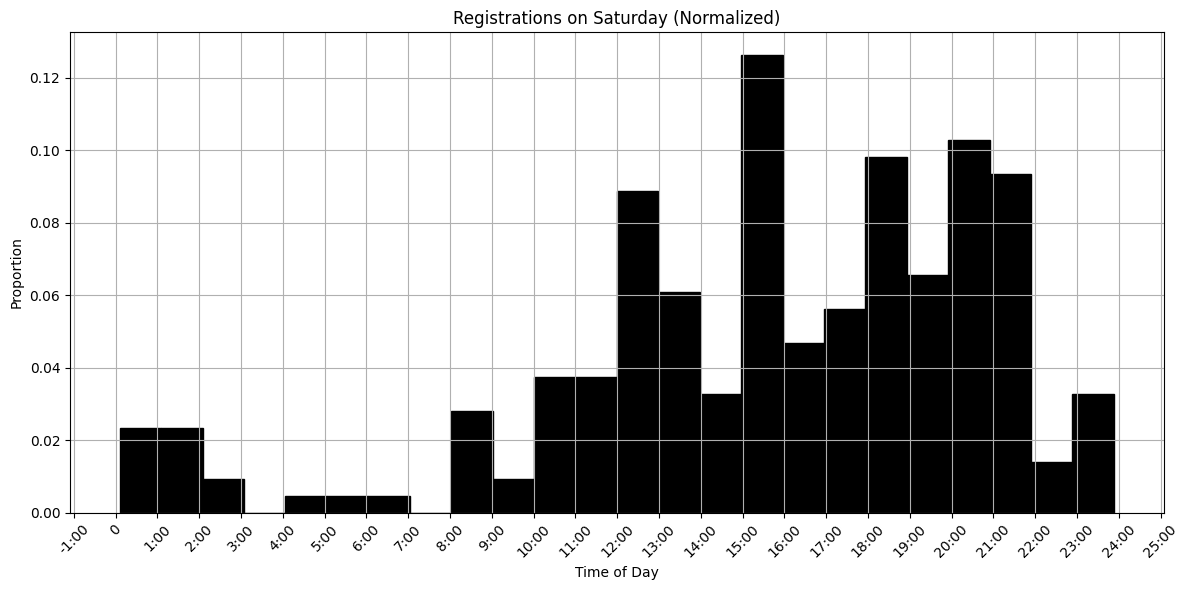


 On Saturdays, we have different peaks. First is at 11 am. Second at 3 pm. Third at 7 pm. 
 This suggests registration after a late-morning rise, after lunch, and after dinner.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filter for Saturdays
filter2_df = main_df[main_df['DayOfWeek'].str.contains('Saturday', case=False, na=False)]

def time_to_seconds(time_obj):
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

filter2_df['Seconds'] = filter2_df['Time'].apply(time_to_seconds)

# Calculate weights to normalize frequencies
weights = [1 / len(filter2_df)] * len(filter2_df)

# Create histogram with human-readable time intervals
plt.figure(figsize=(12, 6))
plt.hist(filter2_df['Seconds'], bins=24, edgecolor='black', color='black', weights=weights)

# Set x-axis ticks to be in hours and minutes
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3600))  # Interval of 1 hour

# Format the x-axis labels as hours
def seconds_to_hours(seconds):
    hours = seconds // 3600
    return f'{hours}{":00" if hours != 0 else ""}'

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: seconds_to_hours(int(x))))

# Add labels and title
plt.xlabel('Time of Day')
plt.ylabel('Proportion')
plt.title('Registrations on Saturday (Normalized)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

print("\n On Saturdays, we have different peaks. First is at 11 am. Second at 3 pm. Third at 7 pm. \n This suggests registration after a late-morning rise, after lunch, and after dinner.")


# Gender

In [ ]:
df['Pronouns'].value_counts(normalize=True)

,proportion
Pronouns,
she/her,0.479607
he/him,0.425227
they/them,0.068731
other not listed here,0.026435


In [ ]:
# Replace values
df['Pronouns'] = df['Pronouns'].replace({'he/him':'male','she/her':'female','they/them':'nonbinary','other not listed here':'nonbinary','other  not listed here':'nonbinary'})
df['Pronouns'].value_counts()


<ipython-input-27-40c44dac4a76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pronouns'] = df['Pronouns'].replace({'he/him':'male','she/her':'female','they/them':'nonbinary','other not listed here':'nonbinary','other  not listed here':'nonbinary'})


,count
Pronouns,
female,635
male,563
nonbinary,126


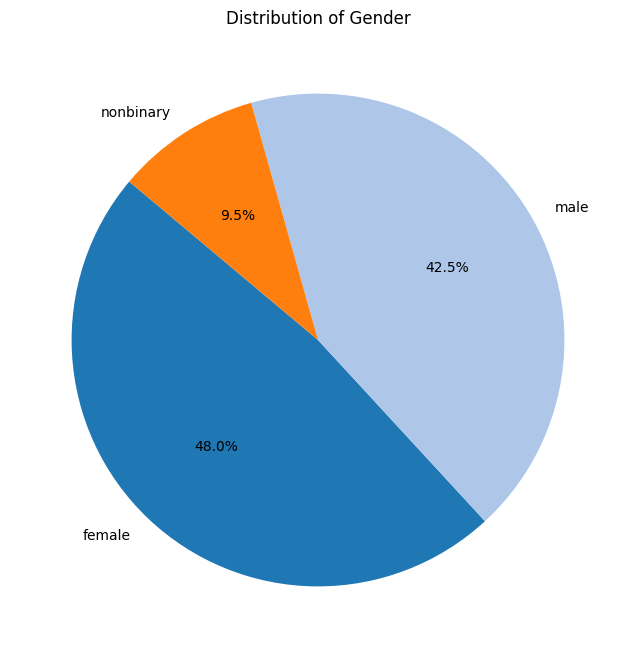

In [ ]:
# Count the occurrences of each pronoun
pronoun_counts = df['Pronouns'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pronoun_counts, labels=pronoun_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Gender')
plt.show()

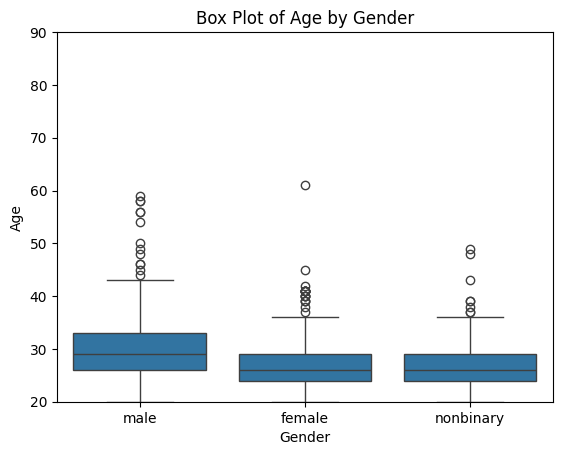

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains 'Pronouns' and 'Age' columns
group_order = ['male','female','nonbinary']
sns.boxplot(x='Pronouns', y='Age', data=df, order = group_order)
plt.ylim(20, 90)  # Adjust based on your data range


# Add labels and a title
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Box Plot of Age by Gender")

# Show the plot
plt.show()


# Order History

In [ ]:
df['New'].value_counts()

,count
New,
1,998
0,152


In [ ]:
df.describe()

,Order Date,Visits,New
count,1150,1150.000000,1150.000000
mean,2023-08-09 12:44:04.069565184,1.208696,0.867826
min,2023-02-04 16:55:00,1.000000,0.000000
25%,2023-04-19 13:34:00,1.000000,1.000000
50%,2023-06-20 20:44:00,1.000000,1.000000
75%,2023-08-26 19:05:45,1.000000,1.000000
max,2024-08-01 20:17:00,8.000000,1.000000
std,NaN,0.676545,0.338827


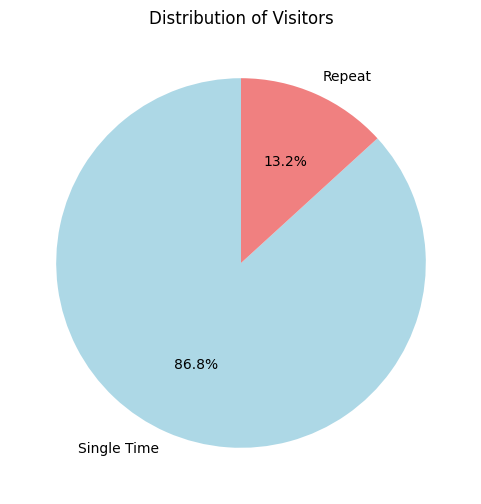

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each unique value in df['New']
new_counts = df['New'].value_counts()

# Create labels for the pie chart
labels = ['Single Time', 'Repeat']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(new_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Visitors')
plt.show()
